In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/monkey_labels.txt
/kaggle/input/validation/validation/n9/n9024.jpg
/kaggle/input/validation/validation/n9/n916.jpg
/kaggle/input/validation/validation/n9/n907.jpg
/kaggle/input/validation/validation/n9/n9030.jpg
/kaggle/input/validation/validation/n9/n918.jpg
/kaggle/input/validation/validation/n9/n902.jpg
/kaggle/input/validation/validation/n9/n914.jpg
/kaggle/input/validation/validation/n9/n912.jpg
/kaggle/input/validation/validation/n9/n9015.jpg
/kaggle/input/validation/validation/n9/n903.jpg
/kaggle/input/validation/validation/n9/n908.jpg
/kaggle/input/validation/validation/n9/n913.jpg
/kaggle/input/validation/validation/n9/n905.jpg
/kaggle/input/validation/validation/n9/n9013.jpg
/kaggle/input/validation/validation/n9/n9011.jpg
/kaggle/input/validation/validation/n9/n9021.jpg
/kaggle/input/validation/validation/n9/n900.jpg
/kaggle/input/validation/validation/n9/n906.jpg
/kaggle/input/validation/validation/n9/n9026.jpg
/kaggle/input/validation/validation/n9/n9012.jpg


In [2]:
#导入必要的库即版本

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import sklearn
import pandas as pd
import os
import sys
import time
import tensorflow as tf

from tensorflow import keras
#import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd,sklearn,tf,keras:
    print(module.__name__, module.__version__)

/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
sys.version_info(major=3, minor=6, micro=6, releaselevel='final', serial=0)
matplotlib 3.0.3
numpy 1.17.0
pandas 0.23.4
sklearn 0.21.3
tensorflow 1.14.0
tensorflow.python.keras.api._v1.keras 2.2.4-tf


/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:541: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:542: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:543: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorboard/compat/tensorflow_stub/dtypes.py:544: FutureWa

In [11]:
train_dir = '../input/training/training'
valid_dir = '../input/validation/validation'
label_file = '../input/monkey_labels.txt'
print(os.path.exists(train_dir))

print(os.listdir(train_dir))
print(os.listdir(valid_dir))

True
['n9', 'n6', 'n8', 'n4', 'n3', 'n1', 'n5', 'n2', 'n0', 'n7']
['n9', 'n6', 'n8', 'n4', 'n3', 'n1', 'n5', 'n2', 'n0', 'n7']


In [4]:
# 读取数据
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label     Latin Name              Common Name                     \
0  n0         alouatta_palliata\t    mantled_howler                   
1  n1        erythrocebus_patas\t    patas_monkey                     
2  n2        cacajao_calvus\t        bald_uakari                      
3  n3        macaca_fuscata\t        japanese_macaque                 
4  n4       cebuella_pygmea\t        pygmy_marmoset                   
5  n5       cebus_capucinus\t        white_headed_capuchin            
6  n6       mico_argentatus\t        silvery_marmoset                 
7  n7      saimiri_sciureus\t        common_squirrel_monkey           
8  n8       aotus_nigriceps\t        black_headed_night_monkey        
9  n9       trachypithecus_johnii    nilgiri_langur                   

    Train Images    Validation Images  
0             131                  26  
1             139                  28  
2             137                  27  
3             152                  30  
4             131 

In [12]:
# 读取图片
height = 128
width =128   # 读取图片后对图片进行缩放,固定大小
channels = 3
batch_size = 64
num_classes = 10
# keras generator读取数据
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255.,  # 像素转为0-1
    rotation_range=40,# 图片随机旋转角度，40代表-40——40之间
    width_shift_range=0.2,# 水平位移，训练模型时使用数据和位移之后的数据
    height_shift_range=0.2,# 垂直位移，（0，1）之间的数代表比例，大于1代表像素值，在0-0.2之间随机选择一个数进行位移
    shear_range=0.2, # 剪切强度
    zoom_range=0.2, # 缩放强度
    horizontal_flip=True,# 随机进行水平翻转
    fill_mode='nearest',# 填充像素规则，如放大操作，nearest代表最近的真实像素
    
)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                  target_size=(height,width),
                                                  batch_size=batch_size,
                                                  seed=7,
                                                  shuffle=True,
                                                   #设置label格式，one-hot编码前，one-hot编码后
                                                  class_mode='categorical')

valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255.)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                   target_size=(height,width),
                                                   batch_size=batch_size,
                                                   seed=7,
                                                   shuffle=True,
                                                   class_mode='categorical'
)
# 训练集、验证集数据量
train_num = train_generator.samples
valid_num = valid_generator.samples
print(train_num, valid_num)

Found 1098 images belonging to 10 classes.
Found 272 images belonging to 10 classes.
1098 272


In [14]:
for i in range(2):
    x,y = train_generator.next()
    print(x.shape, y.shape)
    print(y)

(64, 128, 128, 3) (64, 10)
[[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0.

In [20]:
# 基础模型搭建与训练
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',
                       activation='relu',input_shape=[width,height,channels]),
    keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',
                       activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',
                       activation='relu'),
    keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',
                       activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',
                       activation='relu'),
    keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',
                       activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Flatten(),
    keras.layers.Dense(128,activation='relu'),
    keras.layers.Dense(num_classes,activation='softmax')
])

model.compile(loss='categorical_crossentropy',
             optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 128)      

In [21]:
epochs = 10
# 数据由generator产生
history = model.fit_generator(train_generator,
                             steps_per_epoch=train_num//batch_size,
                             epochs=epochs,
                             validation_data=valid_generator,
                             validation_steps=valid_num//batch_size)



Epoch 1/10
17/17 [==============================] - 35s 2s/step - loss: 2.2698 - acc: 0.1576 - val_loss: 2.1451 - val_acc: 0.2109
Epoch 2/10
17/17 [==============================] - 33s 2s/step - loss: 2.0183 - acc: 0.2660 - val_loss: 1.7989 - val_acc: 0.3438
Epoch 3/10
17/17 [==============================] - 33s 2s/step - loss: 1.8716 - acc: 0.3085 - val_loss: 1.7554 - val_acc: 0.3594
Epoch 4/10
17/17 [==============================] - 33s 2s/step - loss: 1.6829 - acc: 0.3839 - val_loss: 1.6236 - val_acc: 0.3789
Epoch 5/10
17/17 [==============================] - 31s 2s/step - loss: 1.5708 - acc: 0.4304 - val_loss: 1.5022 - val_acc: 0.5000
Epoch 6/10
17/17 [==============================] - 30s 2s/step - loss: 1.4809 - acc: 0.4662 - val_loss: 1.3464 - val_acc: 0.5273
Epoch 7/10
17/17 [==============================] - 32s 2s/step - loss: 1.3667 - acc: 0.5028 - val_loss: 1.3647 - val_acc: 0.5273
Epoch 8/10
17/17 [==============================] - 31s 2s/step - loss: 1.3752 - acc: 0.49

In [22]:
print(history.history.keys())

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


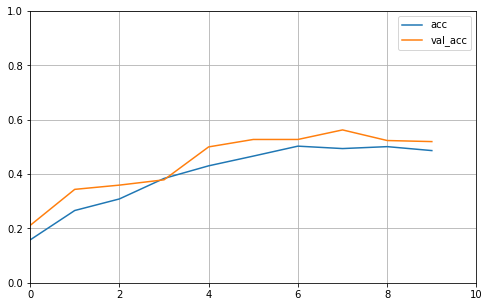

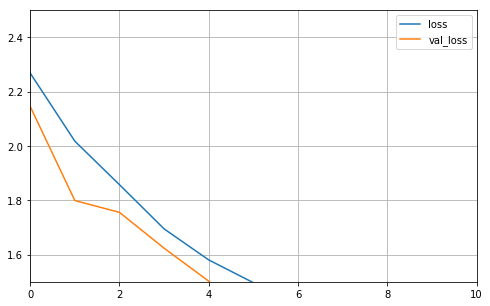

In [25]:
def plot_learning_curves(history, label, epochs, min_value, max_value):
    data={}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8,5))
    plt.grid(True)
    plt.axis([0,epochs,min_value,max_value])
    plt.show()
    
plot_learning_curves(history,'acc',epochs,0,1)
plot_learning_curves(history,'loss',epochs,1.5,2.5)